<a href="https://colab.research.google.com/github/sisomimoctrl/study-tensorflow/blob/main/boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [2]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape, train_targets.shape, test_data.shape, test_targets.shape)
print(type(train_data), type(train_targets), type(test_data), type(test_targets))

(404, 13) (404,) (102, 13) (102,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [3]:
import pandas as pd
import numpy as np

columns_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                'RM', 'AGE', 'DIS', 'RAD', 'TAX', 
                'PTRATIO', 'B', 'LSTAT', 'MEDV']
"""
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
"""

df = pd.DataFrame(np.concatenate((train_data, train_targets.reshape(-1, 1)), axis=1), columns=columns_name)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.5380,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.4150,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.5150,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.7130,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.21977,0.0,6.91,0.0,0.4480,5.602,62.0,6.0877,3.0,233.0,17.9,396.90,16.20,19.4
400,0.16211,20.0,6.96,0.0,0.4640,6.240,16.3,4.4290,3.0,223.0,18.6,396.90,6.59,25.2
401,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,19.4
402,2.14918,0.0,19.58,0.0,0.8710,5.709,98.5,1.6232,5.0,403.0,14.7,261.95,15.79,19.4


In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

X_train = train_data
X_test = test_data

X_train.shape, X_test.shape

((404, 13), (102, 13))

In [5]:
y_train = train_targets
y_test = test_targets

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(13,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [8]:
history = model.fit(X_train, 
                    y_train,
                    epochs=10,
                    batch_size=1,
                    validation_split=0.2)

Epoch 1/10
323/323 [==============================] - 2s 4ms/step - loss: 210.6749 - mae: 10.9477 - val_loss: 62.5656 - val_mae: 5.3251
Epoch 2/10
323/323 [==============================] - 1s 5ms/step - loss: 30.6468 - mae: 3.6756 - val_loss: 25.9325 - val_mae: 3.4984
Epoch 3/10
323/323 [==============================] - 1s 4ms/step - loss: 21.6504 - mae: 3.0076 - val_loss: 17.9629 - val_mae: 3.0281
Epoch 4/10
323/323 [==============================] - 1s 4ms/step - loss: 17.9768 - mae: 2.7321 - val_loss: 16.4524 - val_mae: 2.9737
Epoch 5/10
323/323 [==============================] - 1s 4ms/step - loss: 16.0322 - mae: 2.5770 - val_loss: 15.2536 - val_mae: 2.7442
Epoch 6/10
323/323 [==============================] - 1s 5ms/step - loss: 13.8829 - mae: 2.4418 - val_loss: 16.0654 - val_mae: 3.0996
Epoch 7/10
323/323 [==============================] - 2s 5ms/step - loss: 14.0750 - mae: 2.3856 - val_loss: 14.7409 - val_mae: 2.9934
Epoch 8/10
323/323 [==============================] - 1s 4ms

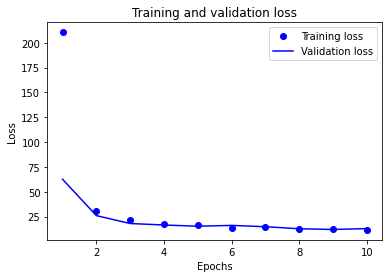

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

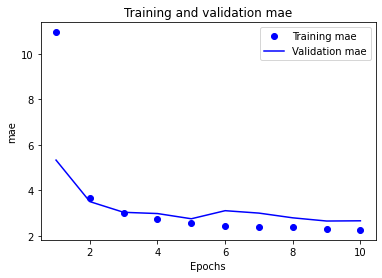

In [10]:
plt.clf()

acc = history.history['mae']
val_acc = history.history['val_mae']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training mae')
plt.plot(epochs, val_acc, 'b', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

In [11]:
scores = model.evaluate(X_test, y_test)
print(f'{model.metrics_names[1]} : {scores[1]}')

4/4 [==============================] - 0s 10ms/step - loss: 20.4282 - mae: 3.1076
mae : 3.1075758934020996
